# Lab Data EDA and Data Cleaning

In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
data = pd.read_excel('app_data_his.xlsx')
data.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
2,14.34,14.9,male,174.0,45.5,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11.87,15.7,male,147.0,34.0,2.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.98,19.7,female,164.0,53.0,4.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ovarialzyste


In [4]:
lab_cols = [9] + list(range(21, 32))
lab_data = data.iloc[:, lab_cols]
lab_data.head()

,Diagnosis,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,Neutrophilia,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,Ketones_in_Urine,RBC_in_Urine,WBC_in_Urine
0,appendicitis,7.7,68.2,NaN,no,5.27,14.8,12.2,254.0,++,+,no
1,appendicitis,8.1,44.0,NaN,no,4.44,12.6,13.6,311.0,no,no,no
2,appendicitis,5.8,47.2,NaN,no,4.78,12.9,12.6,220.0,no,no,no
3,appendicitis,17.1,80.5,NaN,yes,4.75,13.2,12.1,319.0,no,no,no
4,appendicitis,17.0,91.0,NaN,yes,4.10,12.2,11.9,245.0,NaN,NaN,NaN


In [5]:
lab_data.describe()

,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count
count,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000
mean,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618
std,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373
min,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000
25%,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000
50%,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000
75%,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000
max,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000


In [6]:
lab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Diagnosis              780 non-null    object 
 1   WBC_Count              776 non-null    float64
 2   Neutrophil_Percentage  679 non-null    float64
 3   Segmented_Neutrophils  54 non-null     float64
 4   Neutrophilia           732 non-null    object 
 5   RBC_Count              764 non-null    float64
 6   Hemoglobin             764 non-null    float64
 7   RDW                    756 non-null    float64
 8   Thrombocyte_Count      764 non-null    float64
 9   Ketones_in_Urine       582 non-null    object 
 10  RBC_in_Urine           576 non-null    object 
 11  WBC_in_Urine           583 non-null    object 
dtypes: float64(7), object(5)
memory usage: 73.5+ KB


In [7]:
lab_data.isnull().sum()

Diagnosis                  3
WBC_Count                  7
Neutrophil_Percentage    104
Segmented_Neutrophils    729
Neutrophilia              51
RBC_Count                 19
Hemoglobin                19
RDW                       27
Thrombocyte_Count         19
Ketones_in_Urine         201
RBC_in_Urine             207
WBC_in_Urine             200
dtype: int64

In [8]:
#drop column with almost all NA values
lab_data = lab_data.drop(columns=["Segmented_Neutrophils"])

In [9]:
missing_pattern = lab_data.isnull().any(axis=1)
print(f"A total of {missing_pattern.sum()} patients had at least one record missing")

A total of 276 patients had at least one record missing


In [10]:
complete_cases = lab_data.dropna()
print(f"The number of patients was recorded completely: {len(complete_cases)}/{len(lab_data)} ({(len(complete_cases)/len(lab_data))*100:.1f}%)")

The number of patients was recorded completely: 507/783 (64.8%)


In [11]:
lab_data = lab_data.dropna()

In [12]:
#convert categorical to numerical through mapping

# no range for ketones in urine or wbc in urine for + levels, so make binary 0/1
ketone_mapping = {"no": 0, "+": 1, "++": 1, "+++": 1}
lab_data["Ketones_in_Urine"] = lab_data["Ketones_in_Urine"].map(ketone_mapping)

wbc_mapping = {"no": 0, "+": 1, "++": 1, "+++": 1}
lab_data["WBC_in_Urine"] = lab_data["WBC_in_Urine"].map(ketone_mapping)

# numerical range provided for rbc in urine, so make levels 0-3
rbc_mapping = {"no": 0, "+": 1, "++": 2, "+++": 3}
lab_data["RBC_in_Urine"] = lab_data["RBC_in_Urine"].map(rbc_mapping)

# convert yes/no to 0/1 for neutrophilia
neutrophilia_mapping = {"no": 0, "yes": 1}
lab_data["Neutrophilia"] = lab_data["Neutrophilia"].map(neutrophilia_mapping)

# Univariate Analysis and Outlier Detection

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
def analyze_numeric_distribution(data, variables):
    data_copy = data.copy()
    for var in variables:
        print(f"\n=== {var} distribution analysis ===")
        print(data_copy[var].describe())

        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        sns.distplot(data_copy[var].dropna(), kde=True, bins=30)
        plt.title(f'{var} Distribution histogram')

        plt.subplot(1, 3, 2)
        sns.boxplot(x=data_copy[var])
        plt.title(f'{var} box plots')

        plt.subplot(1, 3, 3)
        from scipy import stats
        stats.probplot(data_copy[var].dropna(), plot=plt)
        plt.title(f'{var}Q-Q plot')

        plt.tight_layout()
        plt.show()

        q1 = data_copy[var].quantile(0.25)
        q3 = data_copy[var].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
        outliers = data_copy[(data_copy[var] < lower_bound) | (data_copy[var] > upper_bound)]
        print(f"{len(outliers)} Potential outliers (based on IQR method)")
        if len(outliers) > 0:
            print(outliers[var])


=== WBC_Count distribution analysis ===
count    507.000000
mean      12.350296
std        5.288904
min        4.000000
25%        8.100000
50%       11.300000
75%       15.800000
max       37.700000
Name: WBC_Count, dtype: float64


/Users/jonathonhellner/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


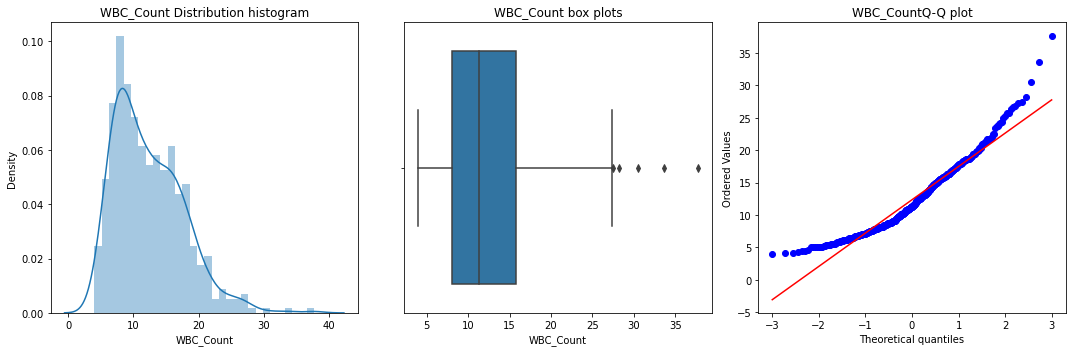

5 Potential outliers (based on IQR method)
247    37.7
303    27.5
363    30.5
482    33.6
714    28.2
Name: WBC_Count, dtype: float64

=== Neutrophil_Percentage distribution analysis ===
count    507.000000
mean      70.721696
std       14.681236
min       27.200000
25%       58.200000
50%       73.800000
75%       83.300000
max       97.700000
Name: Neutrophil_Percentage, dtype: float64


/Users/jonathonhellner/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


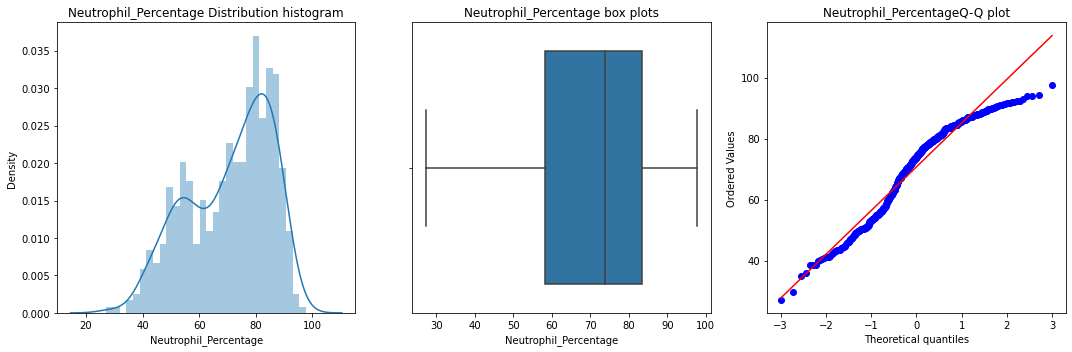

0 Potential outliers (based on IQR method)

=== RBC_Count distribution analysis ===


/Users/jonathonhellner/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    507.000000
mean       4.813984
std        0.546596
min        3.620000
25%        4.555000
50%        4.780000
75%        5.025000
max       14.000000
Name: RBC_Count, dtype: float64


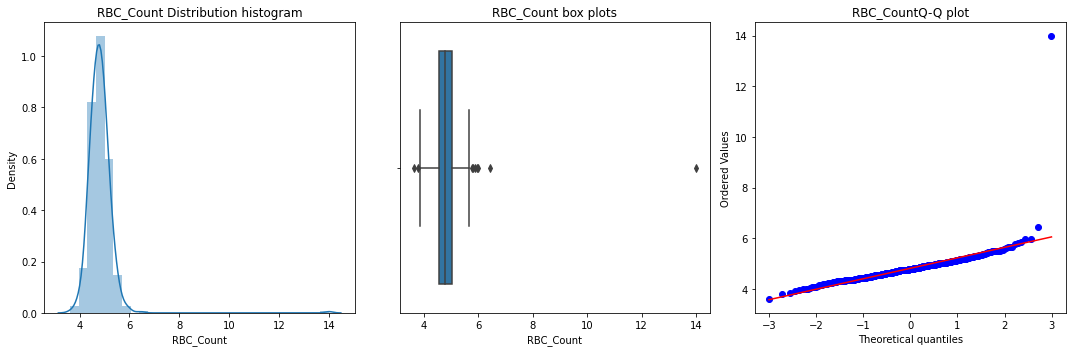

9 Potential outliers (based on IQR method)
41      5.99
85      5.87
89      5.77
151     5.96
323     3.79
397     3.62
507     6.44
580    14.00
627     5.81
Name: RBC_Count, dtype: float64

=== Hemoglobin distribution analysis ===
count    507.000000
mean      13.394477
std        1.098458
min        8.200000
25%       12.700000
50%       13.400000
75%       14.150000
max       17.500000
Name: Hemoglobin, dtype: float64


/Users/jonathonhellner/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


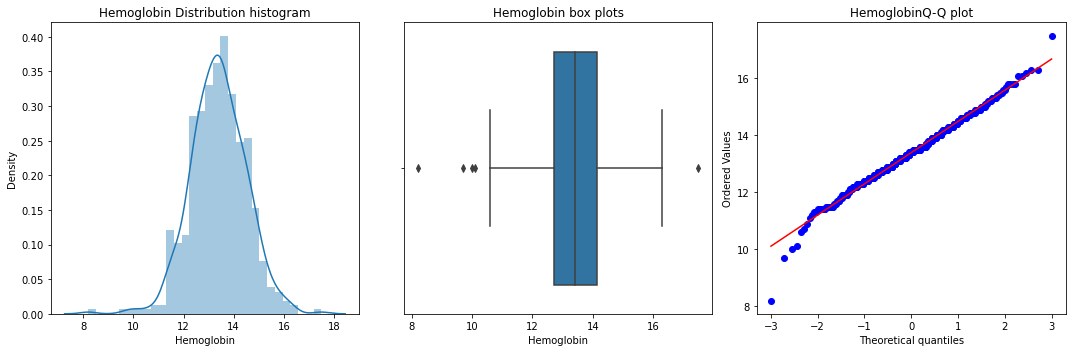

5 Potential outliers (based on IQR method)
27     10.1
89     17.5
214     9.7
380     8.2
397    10.0
Name: Hemoglobin, dtype: float64

=== RDW distribution analysis ===
count    507.000000
mean      13.305325
std        5.507378
min       11.200000
25%       12.300000
50%       12.700000
75%       13.300000
max       86.900000
Name: RDW, dtype: float64


/Users/jonathonhellner/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


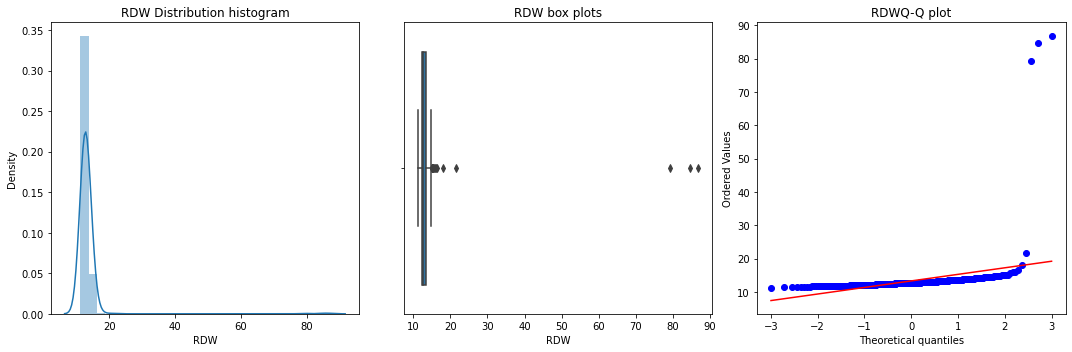

16 Potential outliers (based on IQR method)
27     15.9
99     14.9
120    16.5
127    15.1
214    16.1
225    79.2
241    84.6
270    86.9
277    15.6
281    15.2
380    21.6
485    15.1
507    15.0
523    18.0
619    15.2
702    14.9
Name: RDW, dtype: float64

=== Thrombocyte_Count distribution analysis ===


/Users/jonathonhellner/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    507.000000
mean     282.493097
std       68.597997
min       91.000000
25%      234.500000
50%      275.000000
75%      324.000000
max      542.000000
Name: Thrombocyte_Count, dtype: float64


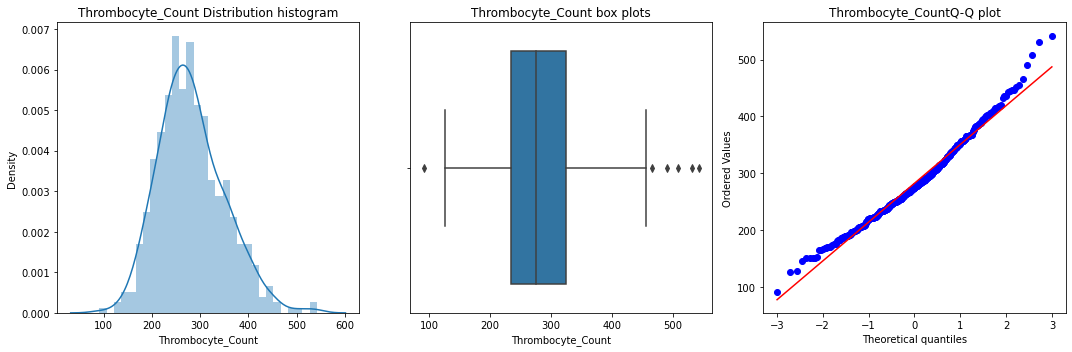

6 Potential outliers (based on IQR method)
67     466.0
164    542.0
313    508.0
500    531.0
526    490.0
564     91.0
Name: Thrombocyte_Count, dtype: float64


In [15]:
numeric_vars = ['WBC_Count', 'Neutrophil_Percentage', 'RBC_Count', 'Hemoglobin','RDW', 'Thrombocyte_Count']
analyze_numeric_distribution(lab_data, numeric_vars)

In [16]:
def analyze_categorical_distribution(data, variables):
    for var in variables:
        print(f"\n=== {var} distribution analysis ===")

        freq = data[var].value_counts(dropna=False)
        print("frequency distribution:")
        print(freq)

        print("\nPercentage distribution:")
        print(freq / len(data) * 100)

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.countplot(x=var, data=data, order=data[var].value_counts().index)
        plt.title(f'{var}frequency distribution')
        plt.xticks(rotation=45)

        plt.subplot(1, 2, 2)
        data[var].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.ylabel('')
        plt.title(f'{var}proportional distribution')

        plt.tight_layout()
        plt.show()

In [17]:
categorical_vars = ['Neutrophilia', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine']


=== Neutrophilia distribution analysis ===
frequency distribution:
0    267
1    240
Name: Neutrophilia, dtype: int64

Percentage distribution:
0    52.662722
1    47.337278
Name: Neutrophilia, dtype: float64


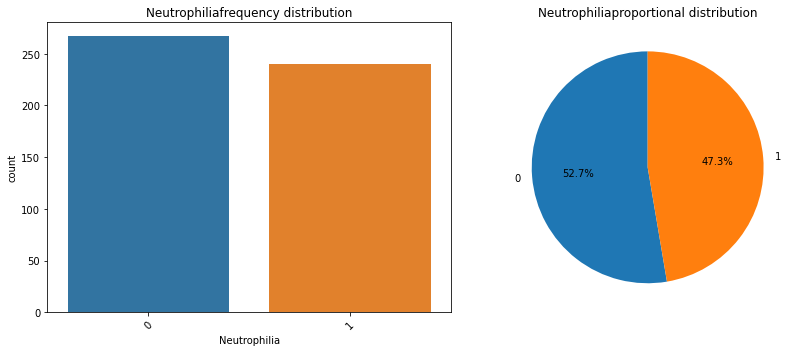


=== Ketones_in_Urine distribution analysis ===
frequency distribution:
0    292
1    215
Name: Ketones_in_Urine, dtype: int64

Percentage distribution:
0    57.593688
1    42.406312
Name: Ketones_in_Urine, dtype: float64


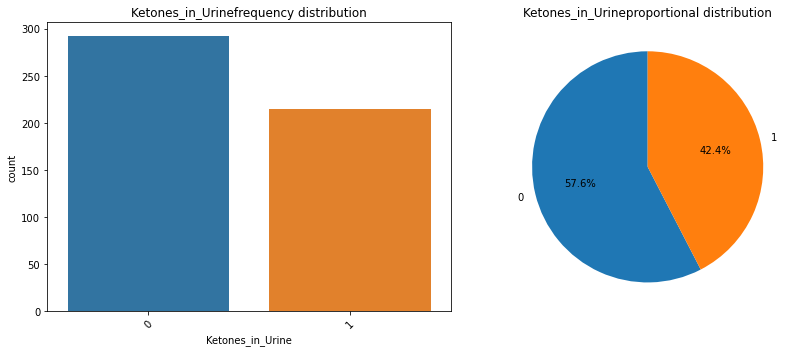


=== RBC_in_Urine distribution analysis ===
frequency distribution:
0    390
1     80
3     23
2     14
Name: RBC_in_Urine, dtype: int64

Percentage distribution:
0    76.923077
1    15.779093
3     4.536489
2     2.761341
Name: RBC_in_Urine, dtype: float64


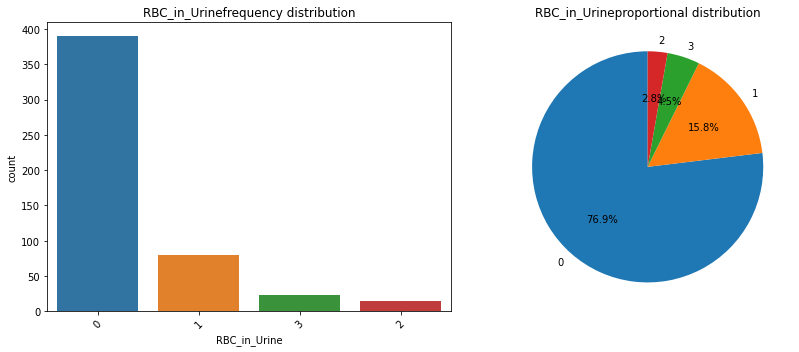


=== WBC_in_Urine distribution analysis ===
frequency distribution:
0    439
1     68
Name: WBC_in_Urine, dtype: int64

Percentage distribution:
0    86.587771
1    13.412229
Name: WBC_in_Urine, dtype: float64


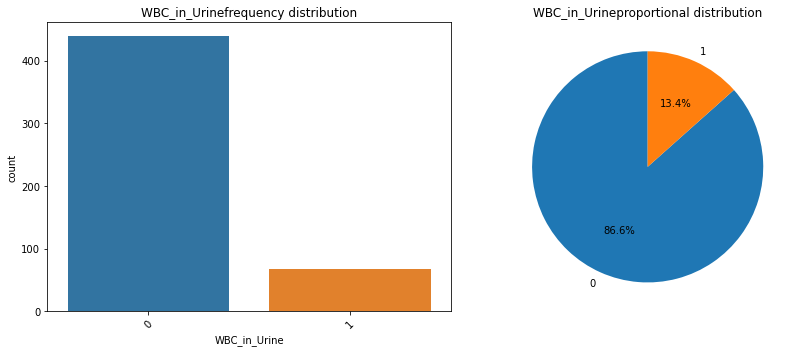

In [18]:
analyze_categorical_distribution(lab_data, categorical_vars)

# Bivariate Analysis


=== WBC_Count Segmented analysis ===


<Figure size 720x432 with 0 Axes>

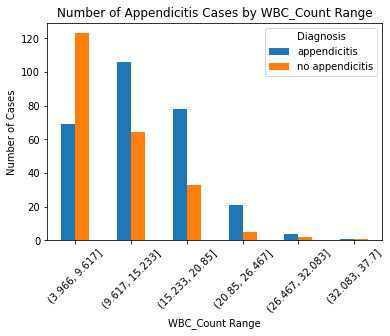

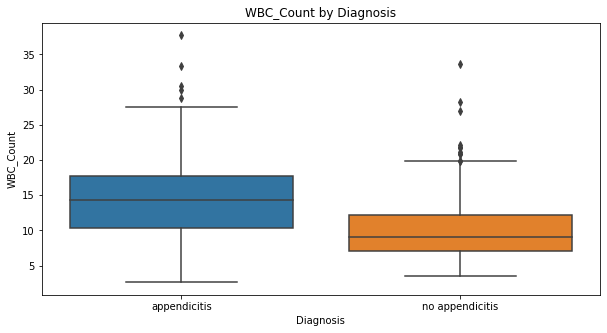


=== Neutrophil_Percentage Segmented analysis ===


<Figure size 720x432 with 0 Axes>

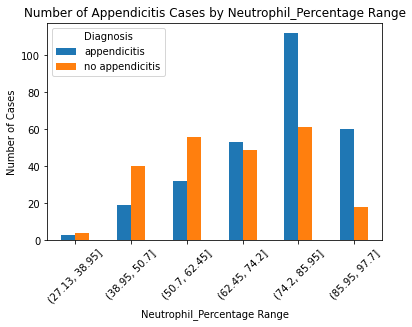

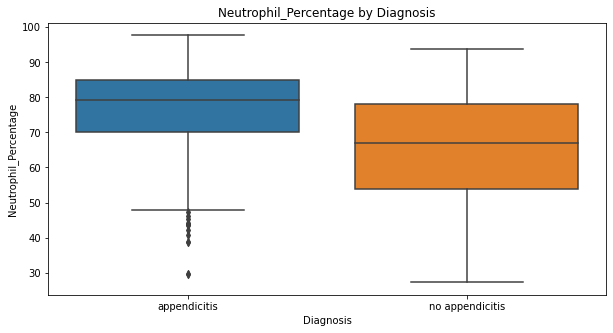


=== RBC_Count Segmented analysis ===


<Figure size 720x432 with 0 Axes>

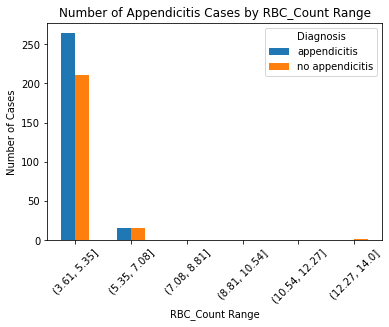

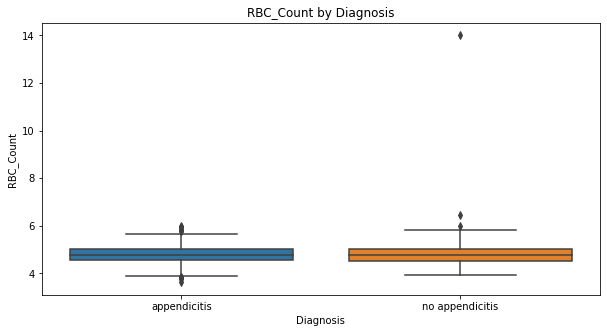


=== Hemoglobin Segmented analysis ===


<Figure size 720x432 with 0 Axes>

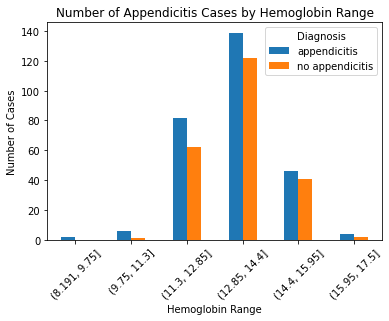

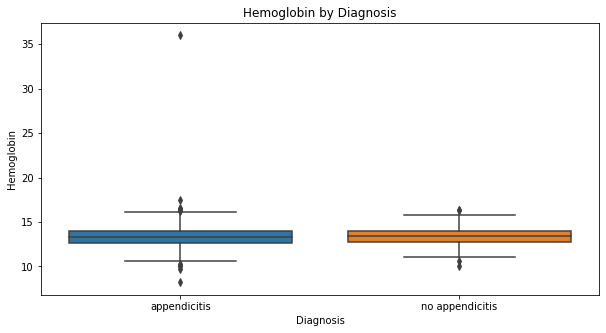


=== RDW Segmented analysis ===


<Figure size 720x432 with 0 Axes>

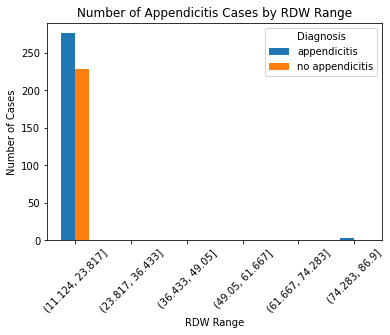

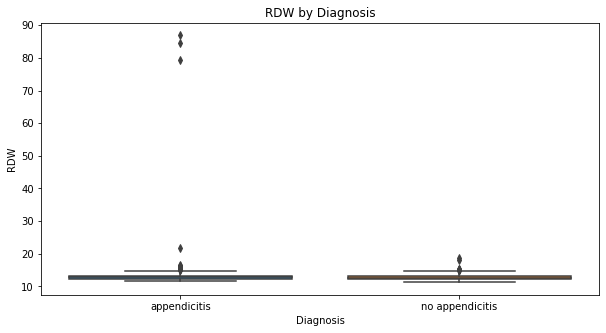


=== Thrombocyte_Count Segmented analysis ===


<Figure size 720x432 with 0 Axes>

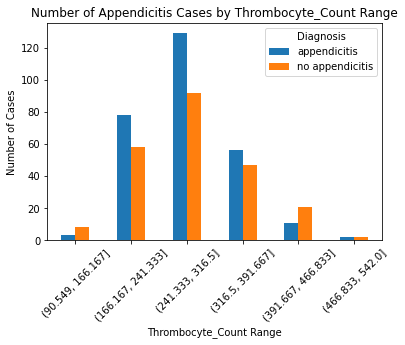

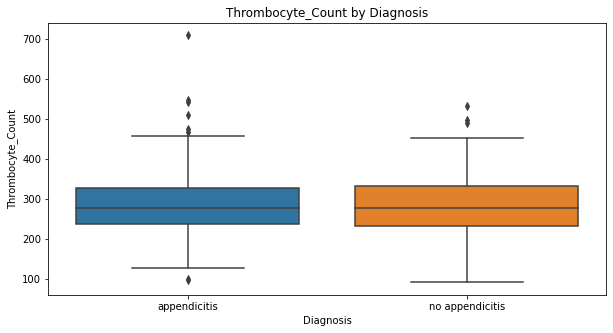

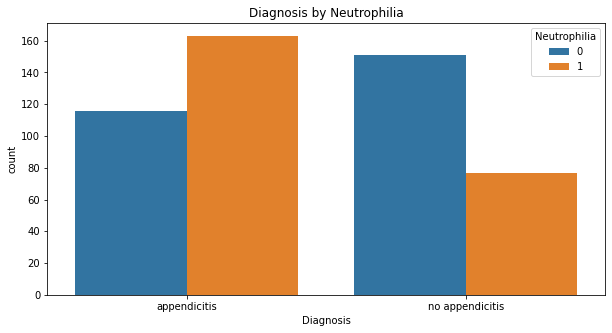

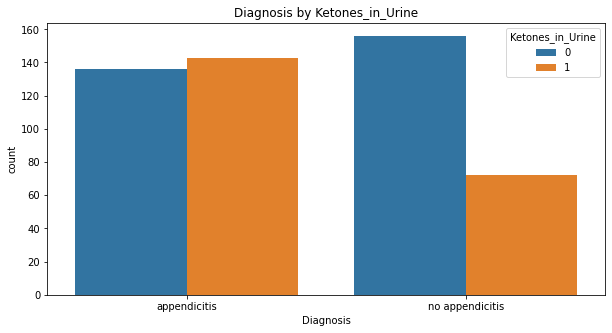

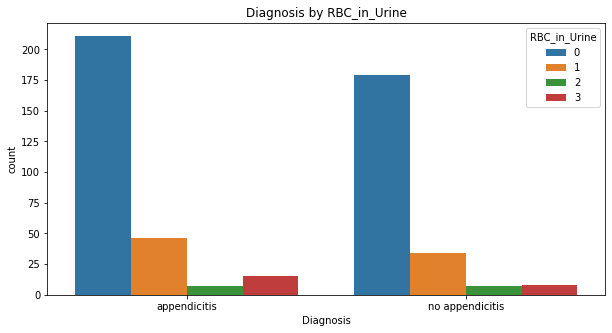

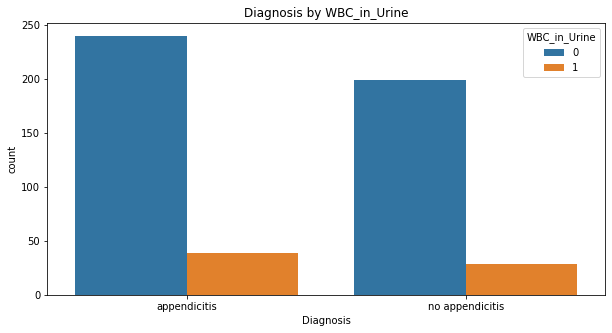

In [20]:
for num in numeric_vars:
    print(f"\n=== {num} Segmented analysis ===")
    data_copy = lab_data.copy()
    data_copy[f'{num}_bin'] = pd.cut(data_copy[num], bins=6)
    counts = data_copy.groupby([f'{num}_bin', 'Diagnosis']).size().unstack().fillna(0)
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'])
    plt.title(f'Number of Appendicitis Cases by {num} Range')
    plt.xlabel(f'{num} Range')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=45)
    plt.legend(title='Diagnosis')
    plt.show()
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Diagnosis', y=num, data=data)
    plt.title(f'{num} by Diagnosis')
    plt.show()

for cat in categorical_vars:
    plt.figure(figsize=(10,5))
    sns.countplot(x='Diagnosis', hue=cat, data=lab_data)
    plt.title(f'Diagnosis by {cat}')
    plt.show()

# Lab Features Correlation Matrix

In [22]:
appendicitis_mapping = {"no appendicitis": 0, "appendicitis": 1}
lab_data["Diagnosis"] = lab_data["Diagnosis"].map(appendicitis_mapping)

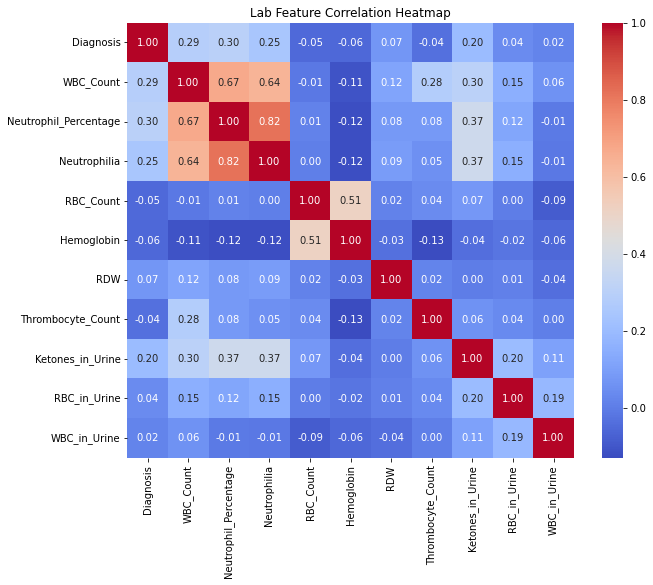

In [23]:
corr_matrix = lab_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Lab Feature Correlation Heatmap")
plt.show()

# Lab Features From Highest to Lowest Correlation with Diagnosis

In [25]:

features = corr_matrix['Diagnosis'].abs().sort_values(ascending=False)
print("Selected Features:", features)

Selected Features: Diagnosis                1.000000
Neutrophil_Percentage    0.301162
WBC_Count                0.289705
Neutrophilia             0.245608
Ketones_in_Urine         0.198055
RDW                      0.073875
Hemoglobin               0.056216
RBC_Count                0.053670
RBC_in_Urine             0.040448
Thrombocyte_Count        0.035036
WBC_in_Urine             0.018381
Name: Diagnosis, dtype: float64
